In [13]:
import pandas as pd

# Lê o arquivo CSV e ignora linhas com erros
tabela = pd.read_csv("../data/cancelamentos.csv", on_bad_lines="skip")

tabela = tabela.drop("CustomerID", axis=1)

# Exibe informações sobre o DataFrame
info_tabela = tabela.info()
display(info_tabela)


/tmp/ipykernel_28291/1662165445.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela = pd.read_csv("../data/cancelamentos.csv", on_bad_lines="skip")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881664 entries, 0 to 881663
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881664 non-null  object 
 3   frequencia_uso          881664 non-null  object 
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881664 non-null  object 
 7   duracao_contrato        881664 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(6), object(5)
memory usage: 74.0+ MB


None

In [14]:
tabela = tabela.dropna()
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881664 entries, 0 to 881663
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881664 non-null  object 
 3   frequencia_uso          881664 non-null  object 
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881664 non-null  object 
 7   duracao_contrato        881664 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(6), object(5)
memory usage: 74.0+ MB


None

In [15]:
# Quantidade absoluta de pessoas que cancelaram e não cancelaram
cancelou_counts = tabela["cancelou"].value_counts()

# Exibe a contagem absoluta de cancelamentos e não cancelamentos
display(cancelou_counts)

# Calcula e exibe a porcentagem de cancelamentos e não cancelamentos em relação ao total
cancelou_percent = tabela["cancelou"].value_counts(normalize=True).map("{:.2%}".format)
display(cancelou_percent)

cancelou
1.0    499998
0.0    381666
Name: count, dtype: int64

cancelou
1.0    56.71%
0.0    43.29%
Name: proportion, dtype: object

In [16]:
# Exibe a contagem normalizada da coluna 'duracao_contrato'
display(tabela["duracao_contrato"].value_counts(normalize=True))

# Exibe a contagem não normalizada da coluna 'duracao_contrato'
display(tabela["duracao_contrato"].value_counts())

# Exibe a porcentagem da coluna 'duracao_contrato'
display(tabela["duracao_contrato"].value_counts(normalize=True).map("{:.2%}".format))

duracao_contrato
Annual       0.401963
Quarterly    0.400447
Monthly      0.197589
Null         0.000001
Name: proportion, dtype: float64

duracao_contrato
Annual       354396
Quarterly    353060
Monthly      174207
Null              1
Name: count, dtype: int64

duracao_contrato
Annual       40.20%
Quarterly    40.04%
Monthly      19.76%
Null          0.00%
Name: proportion, dtype: object

In [17]:
# Analizando o contrato mensal

display(tabela.groupby("duracao_contrato").mean(numeric_only=True))

,idade,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,
Annual,38.842188,3.263395,12.465135,651.696325,14.236120,0.460761
Monthly,41.552222,4.985661,15.007135,550.616445,15.478018,1.000000
Null,52.000000,3.000000,26.000000,830.000000,19.000000,1.000000
Quarterly,38.830896,3.265247,12.460891,651.426516,14.234515,0.460256


In [18]:
tabela = tabela[tabela["duracao_contrato"]!="Monthly"]
display(tabela)
display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
5,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.00,8.0,1.0
6,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.00,24.0,1.0
7,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.00,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881659,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881660,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881661,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881662,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


cancelou
0.0    381666
1.0    325791
Name: count, dtype: int64

cancelou
0.0    53.9%
1.0    46.1%
Name: proportion, dtype: object

In [19]:
display(tabela["assinatura"].value_counts(normalize=True))
display(tabela.groupby("assinatura").mean(numeric_only=True))

assinatura
Standard    0.339646
Premium     0.338138
Basic       0.322213
Null        0.000003
Name: proportion, dtype: float64

,idade,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,
Basic,38.904813,3.310021,12.507054,648.642614,14.240814,0.475188
Null,35.500000,2.500000,13.500000,177.500000,11.500000,1.000000
Premium,38.817869,3.235885,12.433483,653.338371,14.231170,0.452341
Standard,38.790478,3.249275,12.450690,652.566793,14.234280,0.454714


In [20]:
#Clientes que cancelaram com menos de 4 ligações

condicao = tabela["ligacoes_callcenter"] <= 4

tabela = tabela[condicao]

display(tabela["cancelou"].value_counts())

display(tabela["cancelou"].value_counts(normalize=True))

cancelou
0.0    379032
1.0    136019
Name: count, dtype: int64

cancelou
0.0    0.735912
1.0    0.264088
Name: proportion, dtype: float64

In [21]:
# com menos de 20 dias de atraso

condicao = tabela["dias_atraso"] <= 20

tabela = tabela[condicao]

display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True))

cancelou
0.0    379032
1.0     85448
Name: count, dtype: int64

cancelou
0.0    0.816035
1.0    0.183965
Name: proportion, dtype: float64

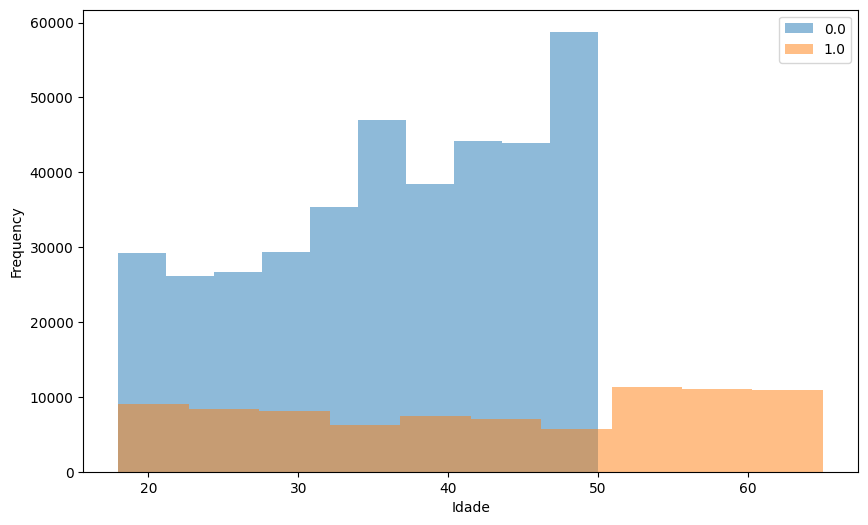

In [29]:
import pandas as pd



tabela.groupby('cancelou')['idade'].plot(kind='hist', bins=10, alpha=0.5, legend=True, figsize=(10, 6))
plt.xlabel('Idade')
plt.ylabel('Frequency')
plt.show()